In [2]:
from mistralai.client import MistralClient

client = MistralClient('')

In [3]:
import pandas as pd

df = pd.read_csv('data.csv')
data = df['Sentence'].tolist()
df.head()

,Unnamed: 0,Sentence,Label
0,0,The Cardiff Roller Collective (CRoC) are a rol...,11
1,1,"""Go! Pack Go!"" is the fight song of the Green ...",11
2,2,Al-Machriq (English translation: The East) was...,14
3,3,Ajman International Airport (Arabic: مطار عجما...,0
4,4,Kapla is a construction set for children and a...,4


In [37]:
def get_text_embedding(text):
    embeddings = client.embeddings(model = "mistral-embed", input=[text]).data[0].embedding
    return embeddings


print(get_text_embedding(data[0]))

[-0.0196533203125, 0.0006737709045410156, 0.02239990234375, -0.0321044921875, 0.02874755859375, 0.0119171142578125, 0.006290435791015625, -0.0232391357421875, -0.0229644775390625, -0.059234619140625, 0.0011205673217773438, 0.033538818359375, -0.0150299072265625, -0.00702667236328125, -0.0555419921875, -0.0058441162109375, 0.004268646240234375, 0.0257415771484375, 0.00960540771484375, 0.01541900634765625, -0.01611328125, -0.019012451171875, -0.03436279296875, 0.010528564453125, -0.0506591796875, 0.014251708984375, -0.0082855224609375, -0.04876708984375, -0.0276947021484375, 0.0210723876953125, 0.0110321044921875, -0.0210418701171875, -0.01007080078125, 0.0138397216796875, -0.0165863037109375, -0.01551055908203125, -0.01511383056640625, -0.06829833984375, 0.0168914794921875, 0.0009608268737792969, -0.0279541015625, -0.0167694091796875, -0.008575439453125, -0.00994110107421875, -0.0296173095703125, -0.0174713134765625, 0.004787445068359375, 0.000522613525390625, 0.0051422119140625, -0.013

In [23]:
# def get_embeddings_by_chunks(data, chunk_size):
#     chunks = [data[x:x+chunk_size] for x in range(0, len(data), chunk_size)]
#     embeddings_response = [client.embeddings(model="mistral-embed", input=c) for c in chunks]
#     embeddings = []
#     for i in range(len(embeddings_response)):
#         for d in embeddings_response[i].data:
#             embeddings.append(d.embedding)
#     return embeddings



In [10]:
# df['embedding'] = get_embeddings_by_chunks(df['Sentence'].tolist(), 1000)
# # df.to_csv('data_with_embeddings.csv', index=False)
# df.head()

,Unnamed: 0,Sentence,Label,embedding
0,0,The Cardiff Roller Collective (CRoC) are a rol...,11,"[-0.019622802734375, 0.0006594657897949219, 0...."
1,1,"""Go! Pack Go!"" is the fight song of the Green ...",11,"[-0.019378662109375, 0.00595855712890625, 0.03..."
2,2,Al-Machriq (English translation: The East) was...,14,"[-0.01538848876953125, 0.033447265625, 0.03771..."
3,3,Ajman International Airport (Arabic: مطار عجما...,0,"[0.01739501953125, 0.0211639404296875, 0.06280..."
4,4,Kapla is a construction set for children and a...,4,"[-0.032470703125, 0.0290985107421875, 0.066040..."


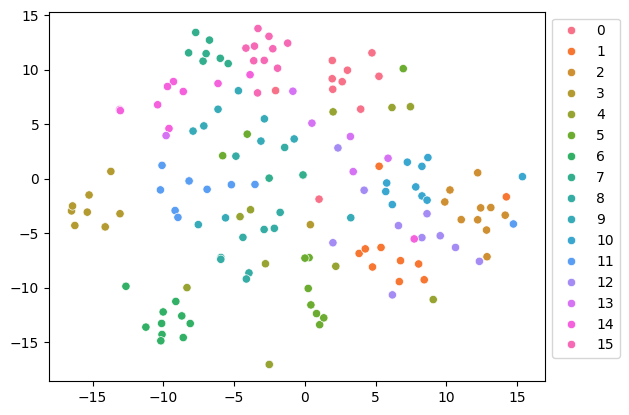

In [44]:
# Visualize embeddings
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=0).fit_transform(np.array(df['embedding'].to_list()))

palette = sns.color_palette("husl", len(df['Label'].unique()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['Label'].to_list()), palette=palette)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

In [24]:
# Cosine Similarity 
from sklearn.metrics.pairwise import cosine_similarity


data = df['Sentence'].tolist()

def get_cosine_similarity(sent1, sent2):
    embedding1 = get_text_embedding(sent1)
    print(sent1)
    print(sent2)
    embedding2 = get_text_embedding(sent2)
    similarity = cosine_similarity([embedding1], [embedding2])
    return similarity[0][0]

print(get_cosine_similarity(data[0], data[10]))

The Cardiff Roller Collective (CRoC) are a roller sports league based in Cardiff, Wales. Founded
Akaflieg is an abbreviation for Akademische Fliegergruppe, groups of aeronautical engineering students from individual German
0.6684556918499531


In [43]:
# Faiss Search
import faiss

embeddings_np = np.array(embeddings).astype('float32')
d = embeddings_np.shape[1]
index = faiss.IndexFlatL2(d)
index.add(embeddings_np)

def faiss_search(sent, k=5):
    query_embed = get_text_embedding(sent)
    query_embed = np.array(query_embed).astype('float32').reshape(1, -1)
    D, I = index.search(query_embed, k)
    sentences = [data[i] for i in I[0]]
    return sentences


print(faiss_search(data[0]))


['The Cardiff Roller Collective (CRoC) are a roller sports league based in Cardiff, Wales. Founded', 'Carniny Amateur & Youth FC is a junior-level football club from Ballymena, County Antrim, Northern', 'Relocation of professional sports teams occurs when a team owner moves a team, generally from', 'Relocation of professional sports teams occurs when a team owner moves a team, generally from', 'Merlin (Welsh: Myrddin, Cornish: Marzhin, Breton: Merzhin) is a mythical figure prominently featured in the']
